In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("KNN_Project_Data")

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [6]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


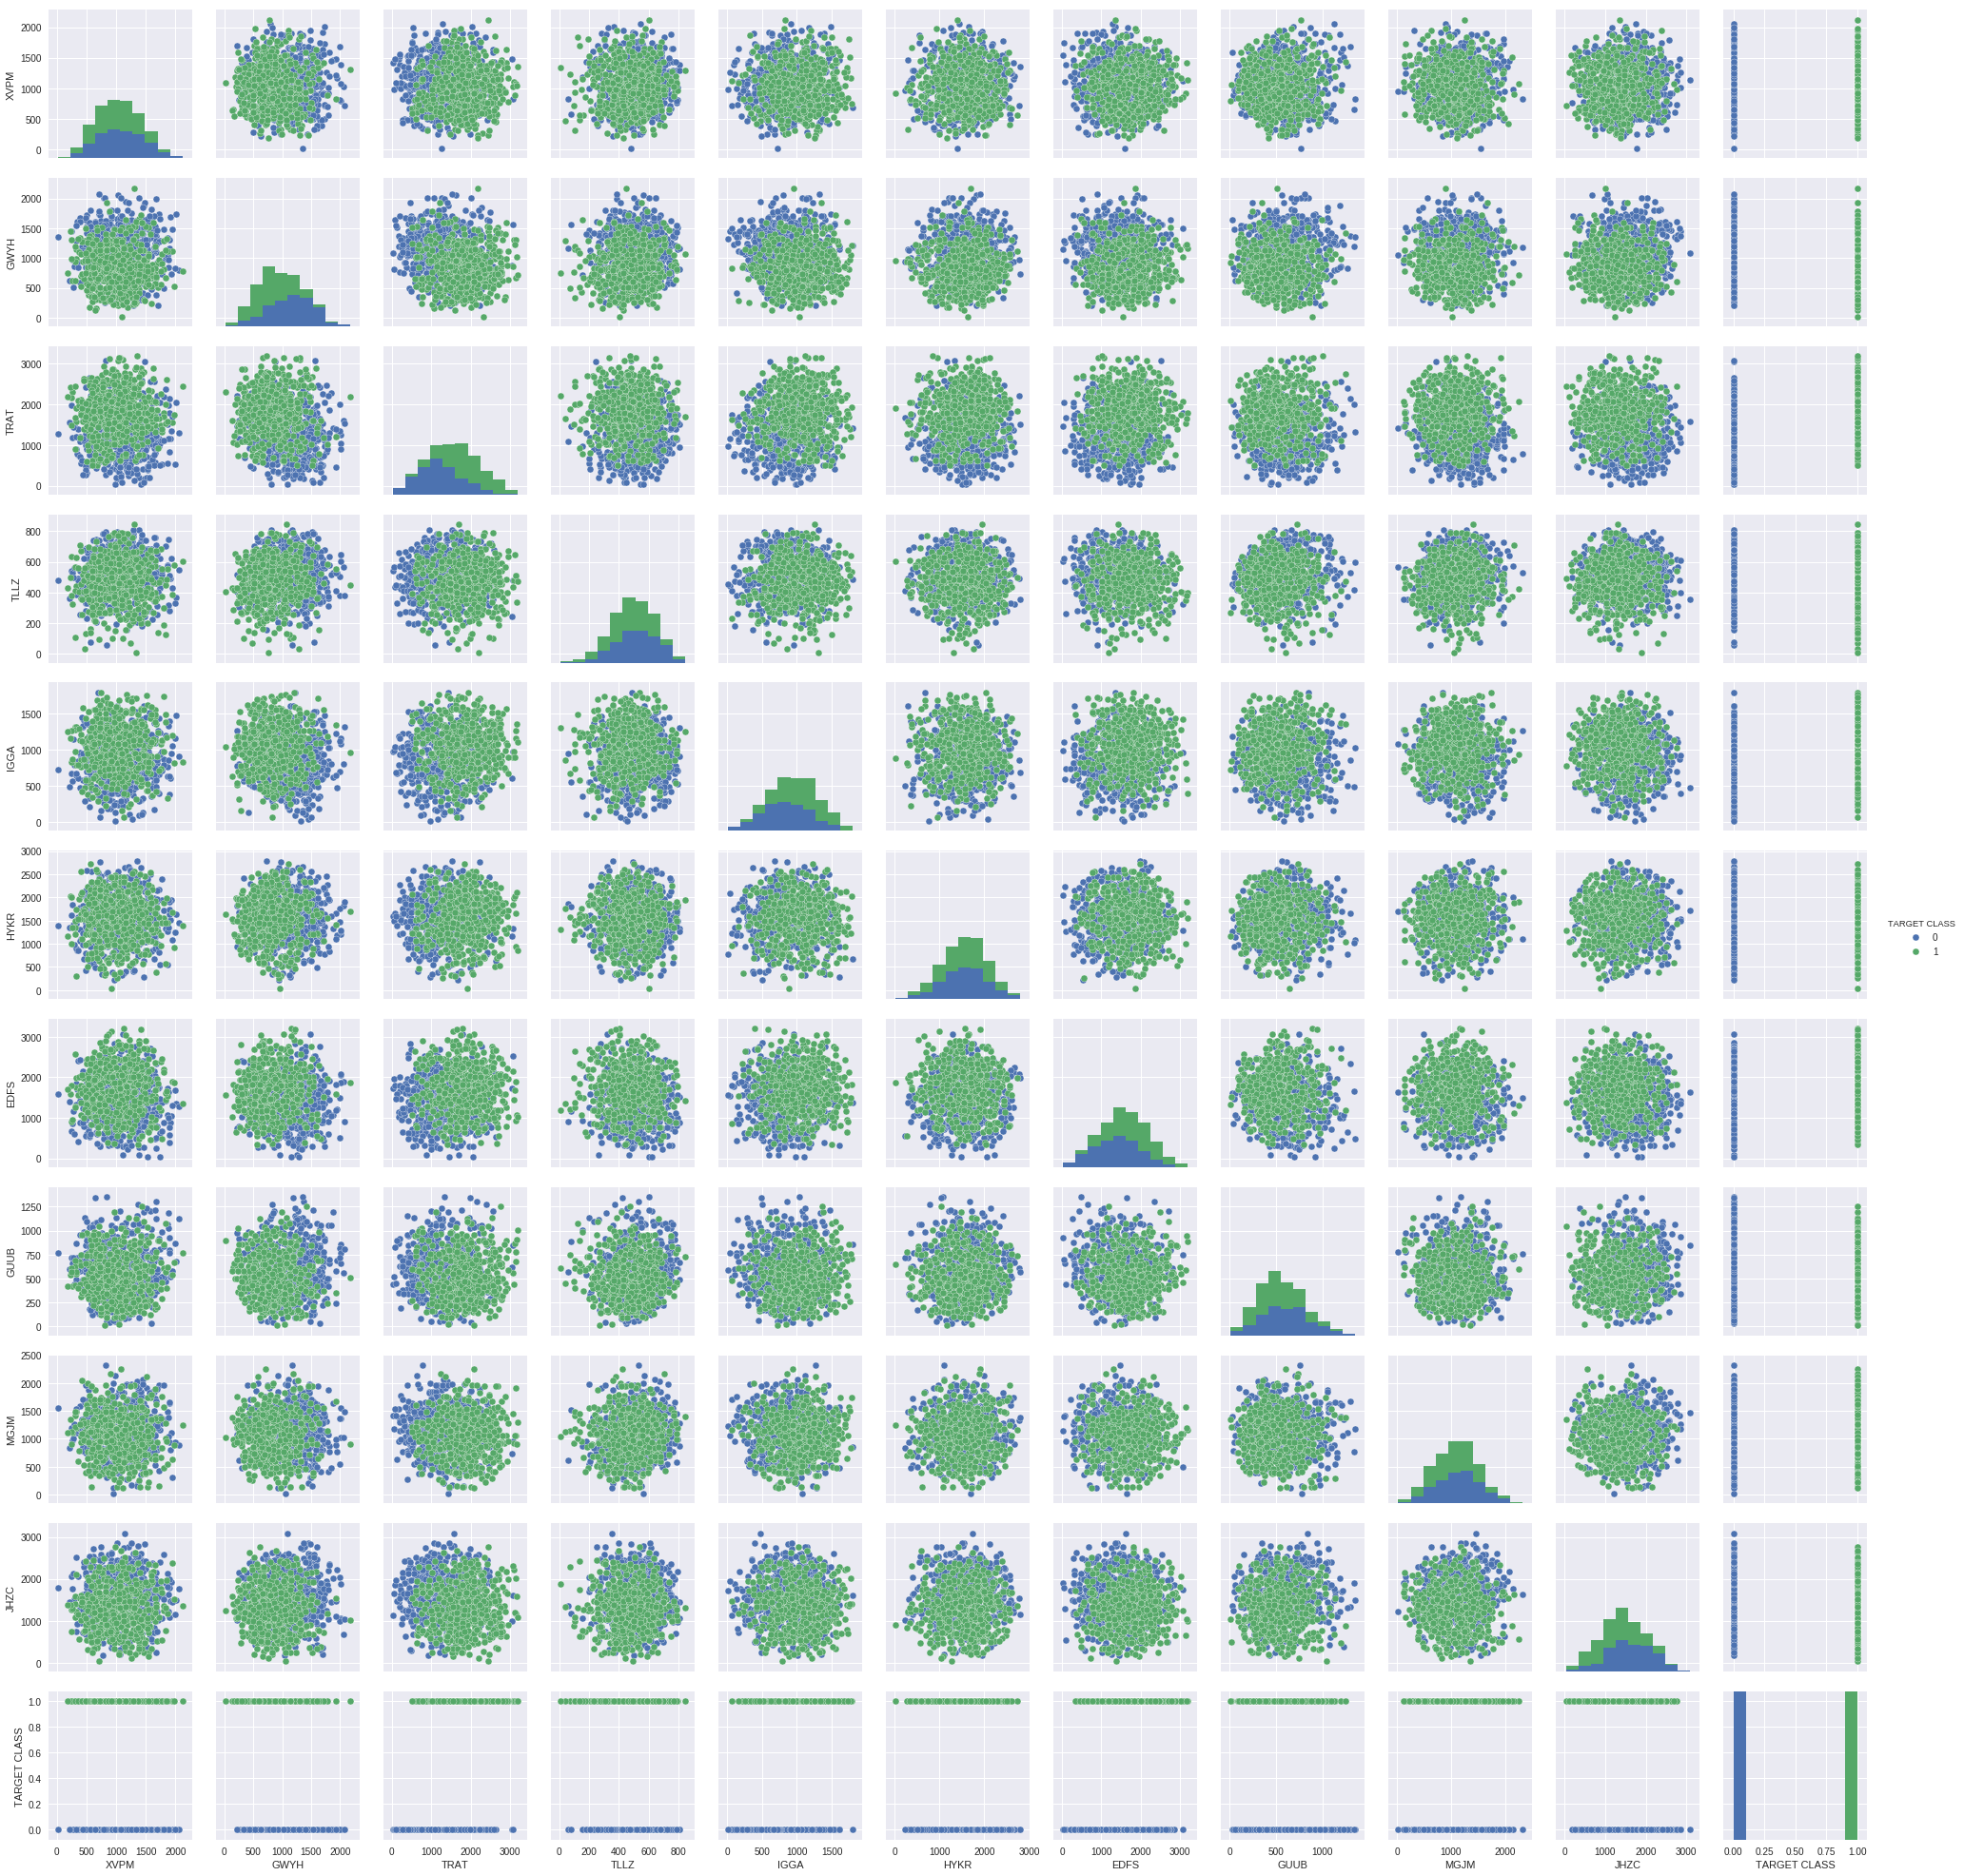

In [7]:
sns.pairplot(df, "TARGET CLASS")

In [ ]:
### Standardize the Variables ###

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_feat = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [15]:
### Split Data ###

In [16]:
X = df_feat
y = df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
### KNN model ###

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
### Predictions ###

In [19]:
pred = knn.predict(X_test)

In [ ]:
### Evaluation ###

In [20]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[109  43]
 [ 41 107]]
             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



In [21]:
### Better K value with Elbow method ###

In [32]:
err_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    err_rate.append(np.mean(y_test != pred_i))

TypeError: 'str' object is not callable

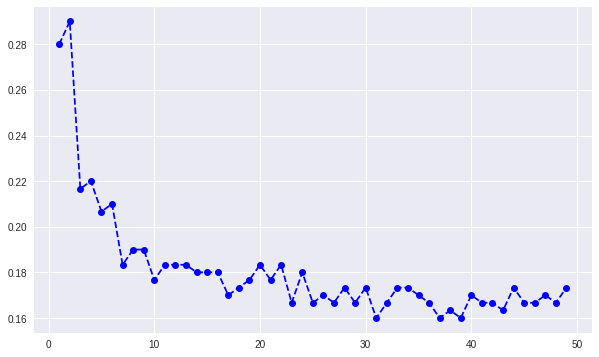

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),err_rate, color="blue", linestyle="dashed",marker="o")
plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [31]:
### New Model with better K ###

In [37]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[123  29]
 [ 19 129]]
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       152
          1       0.82      0.87      0.84       148

avg / total       0.84      0.84      0.84       300

